# Deep Learning
## HW1 - Problem 1 - Recommender System (100 + 20 pts)

### Please fill this part


1.   Full Name: Alireza FarajTabrizi    
2.   Student Number: 97102185


*You are just allowded to change those parts that start with "TO DO". Please do not change other parts.*

*It is highly recommended to read each codeline carefully and try to understand what it exactly does. Best of luck and have fun!*

In [218]:
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import string
import re
import matplotlib.pyplot as plt
import math
from matplotlib import rc
#from google.colab import drive
from sklearn.model_selection import train_test_split
import matplotlib.ticker as ticker
from math import sqrt
import random
import time
from sklearn.metrics import mean_squared_error

%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.3)

rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)

In [219]:
# Change the address as you wish
plays = pd.read_csv('./data/user_artists.dat', sep='\t')
artists = pd.read_csv('./data/artists.dat', sep='\t', usecols=['id','name'])

# Preprocessing (20 pts)

In [220]:
###############################################################################
## TODO: merge two DataSets in a way that below DataFrame is created         ##
###############################################################################
ap=plays.copy()
ap=ap.sort_values(['artistID', 'userID'], ascending=[1, 1], ignore_index=1)

mapping = dict(artists[['id', 'name']].values)
ap['name'] = ap.artistID.map(mapping)

col = ap.pop('name')
ap.insert(0, 'name', col)
ap.insert(0, 'id', ap['artistID'])


In [221]:
ap

,id,name,userID,artistID,weight
0,1,MALICE MIZER,34,1,212
1,1,MALICE MIZER,274,1,483
2,1,MALICE MIZER,785,1,76
3,2,Diary of Dreams,135,2,1021
4,2,Diary of Dreams,257,2,152
...,...,...,...,...,...
92829,18741,Diamanda Galás,454,18741,301
92830,18742,Aya RL,454,18742,294
92831,18743,Coptic Rain,454,18743,287
92832,18744,Oz Alchemist,454,18744,286


In [222]:
###############################################################################
## TODO: rename the weight columns to PlayCount         ##
###############################################################################
ap = ap.rename(columns={"weight": "playCount"})
ap

,id,name,userID,artistID,playCount
0,1,MALICE MIZER,34,1,212
1,1,MALICE MIZER,274,1,483
2,1,MALICE MIZER,785,1,76
3,2,Diary of Dreams,135,2,1021
4,2,Diary of Dreams,257,2,152
...,...,...,...,...,...
92829,18741,Diamanda Galás,454,18741,301
92830,18742,Aya RL,454,18742,294
92831,18743,Coptic Rain,454,18743,287
92832,18744,Oz Alchemist,454,18744,286


In [223]:
###############################################################################
## TODO: Delete the "id" columns and reset_indexes of ap                     ##
###############################################################################
ap=ap.drop('id', axis=1, errors='ignore')
ap

,name,userID,artistID,playCount
0,MALICE MIZER,34,1,212
1,MALICE MIZER,274,1,483
2,MALICE MIZER,785,1,76
3,Diary of Dreams,135,2,1021
4,Diary of Dreams,257,2,152
...,...,...,...,...
92829,Diamanda Galás,454,18741,301
92830,Aya RL,454,18742,294
92831,Coptic Rain,454,18743,287
92832,Oz Alchemist,454,18744,286


In [224]:
###############################################################################
## TODO: Create  a Dataframe like below where "totalUniqueUsers" is the number of
## userID's assigned to each name in "ap" dataframe.
## "totalArtistPlays" is sum of all playcounts assigned to an artist  
## and sort the Frame in descending order of "totalArtistPlays" (highest "totalArtistPlays" at top of table) 
## and "avgUserPlays" is divison of "totalArtistPlays" by "totalUniqueUsers"  
###############################################################################
col1=ap.groupby('name').size()
col2=ap.groupby('name').sum()['playCount']
col3=col2/col1
col1.name='totalUniqueUsers'
col2.name='totalArtistPlays'
col3.name='avgUserPlays'
col1=col1.to_frame()
artist_rank=pd.DataFrame(col1).join(col2).join(col3)
artist_rank=artist_rank.sort_values('totalArtistPlays',ascending=0)

In [225]:
artist_rank

,totalUniqueUsers,totalArtistPlays,avgUserPlays
name,,,
Britney Spears,522,2393140,4584.559387
Depeche Mode,282,1301308,4614.567376
Lady Gaga,611,1291387,2113.563011
Christina Aguilera,407,1058405,2600.503686
Paramore,399,963449,2414.659148
...,...,...,...
Morris,1,1,1.000000
Eddie Kendricks,1,1,1.000000
Excess Pressure,1,1,1.000000


In [226]:
###############################################################################
## TODO: Create  a Dataframe like below where for each name in ap dataframe,
# corresponding row in artist rank is attached to it  
###############################################################################
name=np.array(artist_rank.index)
tuu=artist_rank['totalUniqueUsers'].values
tap=artist_rank['totalArtistPlays'].values
aup=artist_rank['avgUserPlays'].values



d=np.append(name.reshape(name.shape[0],1),tuu.reshape(name.shape[0],1),axis=1)
mapping = dict(d)
ap['totalUniqueUsers'] = ap.name.map(mapping)


d=np.append(name.reshape(name.shape[0],1),tap.reshape(name.shape[0],1),axis=1)
mapping = dict(d)
ap['totalArtistPlays'] = ap.name.map(mapping)


d=np.append(name.reshape(name.shape[0],1),aup.reshape(name.shape[0],1),axis=1)
mapping = dict(d)
ap['avgUserPlays'] = ap.name.map(mapping)


ap['id']=ap['artistID']
col = ap.pop('id')
ap.insert(0, 'id', col)



ap=ap.sort_values('playCount',ascending=0)

In [227]:
ap.head(20)

,id,name,userID,artistID,playCount,totalUniqueUsers,totalArtistPlays,avgUserPlays
2800,72,Depeche Mode,1642,72,352698,282,1301308,4614.567376
35843,792,Thalía,2071,792,324663,26,350035,13462.884615
27302,511,U2,1094,511,320725,185,493024,2664.994595
8152,203,Blur,1905,203,257978,114,318221,2791.412281
26670,498,Paramore,1664,498,227829,399,963449,2414.659148
21191,378,Evanescence,1146,378,203165,226,513476,2272.017699
14165,292,Christina Aguilera,514,292,176133,407,1058405,2600.503686
33309,701,Shakira,1983,701,172496,319,688529,2158.398119
33127,701,Shakira,757,701,169596,319,688529,2158.398119
31835,679,Glee Cast,1086,679,165902,249,506453,2033.947791


# Exploration

In [228]:
def bar_chart_int(x,y,x_label,y_label,title,caption,total_val):
    fig, ax = plt.subplots();
    fig.set_size_inches(16, 5);
    ax = sns.barplot(x=x[:20],y=y[:20], palette='Blues_r');
    ax.set_xlabel(x_label);
    ax.set_ylabel(y_label);
    ax.set_title(title);
    ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: '{:,}'.format(int(x))));

    # our bar label placement
    for p in ax.patches:
        height = p.get_height()
        pct = 100*(height/total_val)
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.1f}%'.format(pct),
                ha="center",verticalalignment='bottom',color='black', fontsize=12);

    # our caption statement
    ax.text(19, max(y[:20])*0.95, caption,horizontalalignment='right');

    plt.xticks(rotation=90);
    plt.show();

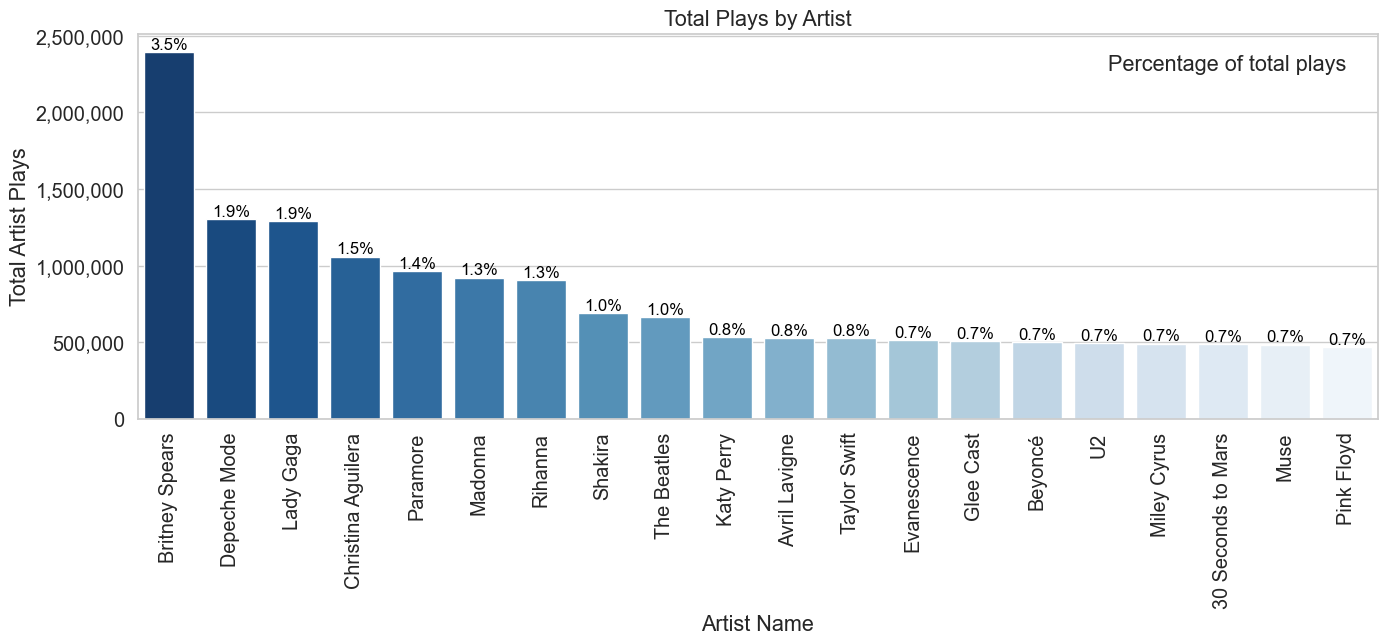

In [229]:
c1 = artist_rank
x = c1.index
y = c1.totalArtistPlays
x_label = 'Artist Name'
y_label = 'Total Artist Plays'
title = 'Total Plays by Artist'
caption = 'Percentage of total plays'
total_val = c1.totalArtistPlays.sum()

bar_chart_int(x,y,x_label,y_label,title,caption,total_val);

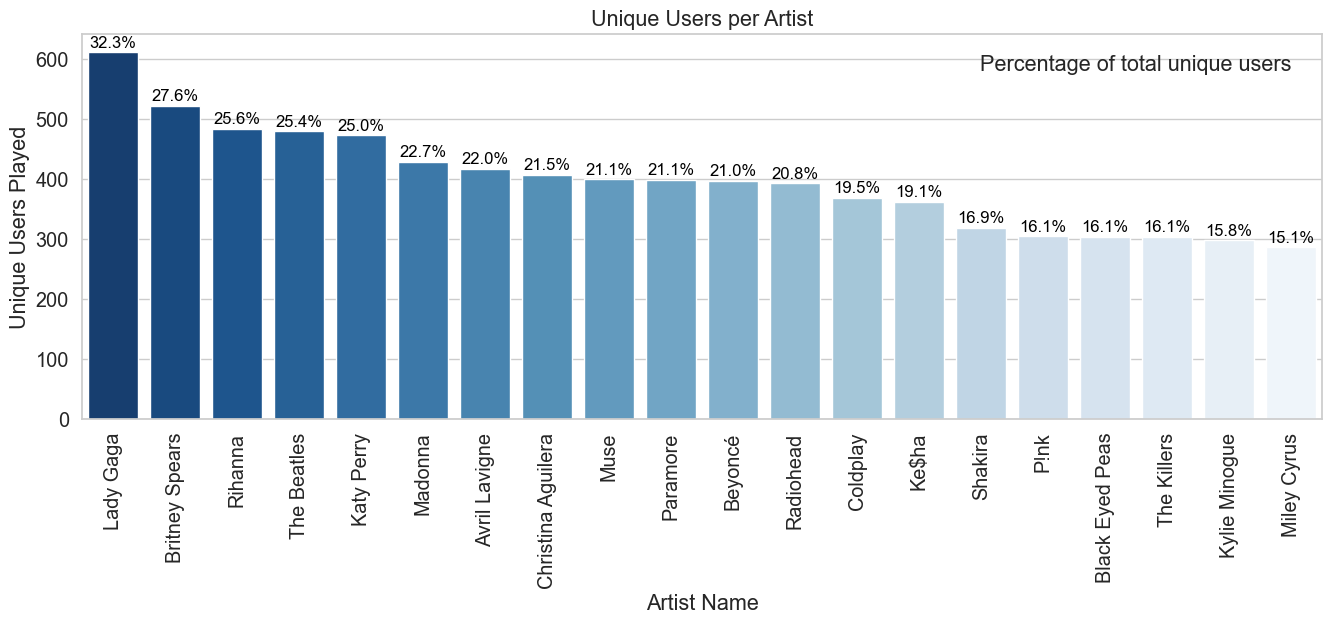

In [230]:
c2 = artist_rank.sort_values(['totalUniqueUsers'],ascending=False)
x = c2.index
y = c2.totalUniqueUsers
x_label = 'Artist Name'
y_label = 'Unique Users Played'
title = 'Unique Users per Artist'
caption = 'Percentage of total unique users'
total_val = ap.userID.nunique()

bar_chart_int(x,y,x_label,y_label,title,caption,total_val)

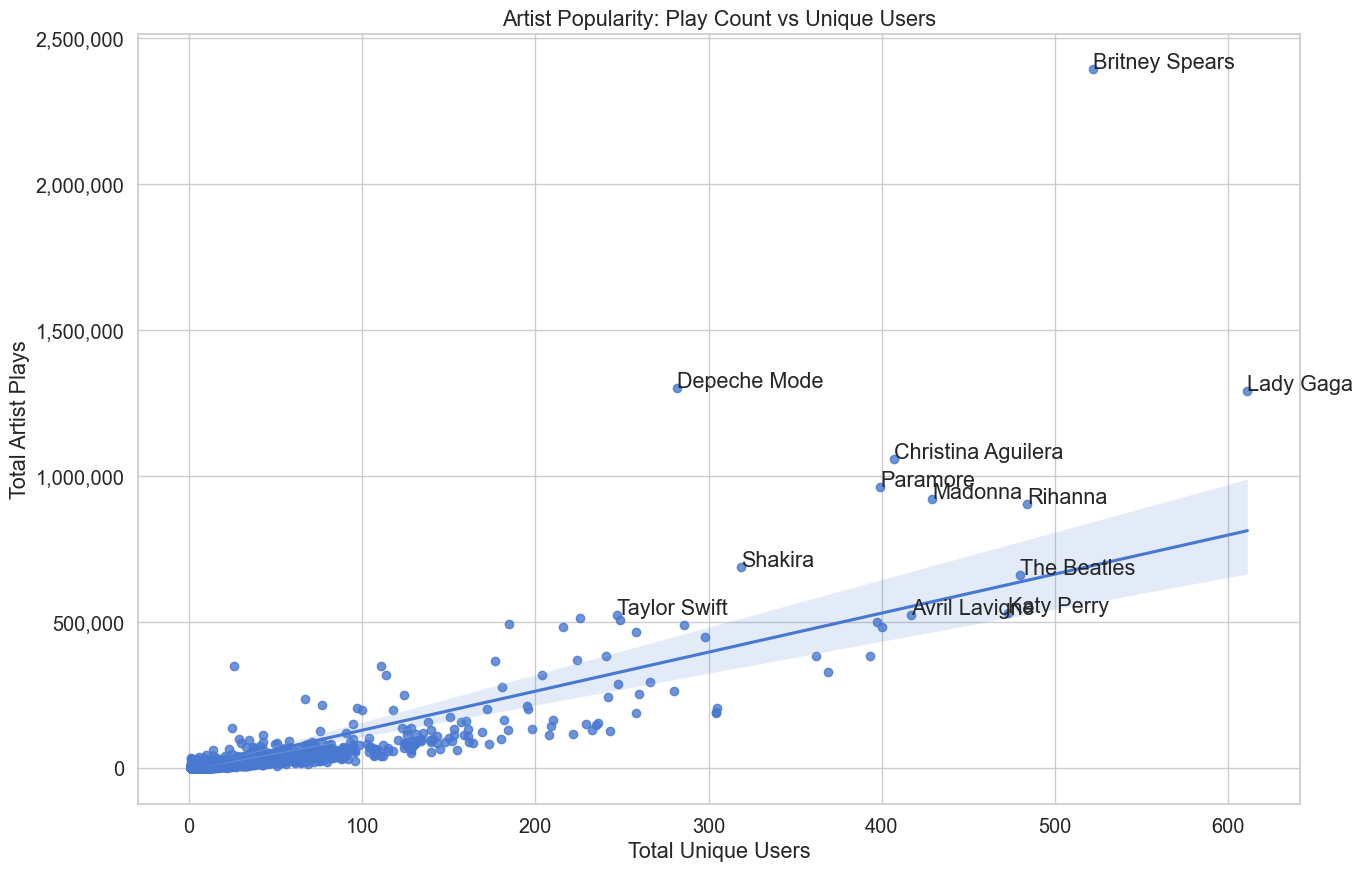

In [231]:
top_artists =  artist_rank.index[:12]

x = artist_rank['totalUniqueUsers']
y = artist_rank['totalArtistPlays'] 
labels =  artist_rank.index
fig, ax = plt.subplots(figsize=(15,10))
sns.regplot(x=x,y=y)
ax.set_title('Artist Popularity: Play Count vs Unique Users')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:,.0f}'.format(y)))
ax.set_xlabel('Total Unique Users')
ax.set_ylabel('Total Artist Plays')

for i, t in enumerate(labels):
    if t in top_artists:
        ax.annotate(t,(x[i],y[i]))

# Preprocessing (30 pts)

In [232]:
pc = ap.playCount 
play_count_scaled = (pc - pc.min()) / (pc.max() - pc.min())
ap = ap.assign(playCountScaled=play_count_scaled)


In [233]:
ap


,id,name,userID,artistID,playCount,totalUniqueUsers,totalArtistPlays,avgUserPlays,playCountScaled
2800,72,Depeche Mode,1642,72,352698,282,1301308,4614.567376,1.000000
35843,792,Thalía,2071,792,324663,26,350035,13462.884615,0.920513
27302,511,U2,1094,511,320725,185,493024,2664.994595,0.909347
8152,203,Blur,1905,203,257978,114,318221,2791.412281,0.731441
26670,498,Paramore,1664,498,227829,399,963449,2414.659148,0.645960
...,...,...,...,...,...,...,...,...,...
38688,913,Destiny's Child,1810,913,1,83,34746,418.626506,0.000000
32955,697,Sia,1290,697,1,56,27597,492.803571,0.000000
71811,4988,Chris Spheeris,510,4988,1,5,3106,621.200000,0.000000
91319,17080,Haylie Duff,1851,17080,1,1,1,1.000000,0.000000


In [234]:
###############################################################################
## TODO: Create  a Dataframe with userID as its rows, artistID as its columns and
## "play_count_scaled" as the value of each cell, in this manner you're creating
## a table which demonstrates what rating each user has for a set of items(artists)
## Your created table should be like below example
###############################################################################

ratings_df=ap.pivot(index="userID", columns="artistID", values="playCountScaled")

In [235]:
ratings_df

artistID,1,2,3,4,5,6,7,8,9,10,...,18736,18737,18738,18739,18740,18741,18742,18743,18744,18745
userID,,,,,,,,,,,,,,,,,,,,,
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2097,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [236]:
###############################################################################
# TODO: Fill each NaN value with 0 and return a numpy array corresponding modified DataFrame
###############################################################################

ratings_df=ratings_df.fillna(0)
ratings = np.array(ratings_df)

In [237]:
###############################################################################
# TODO : Calculate how sparse your data is (in percent) and print it, meaning 
# what fraction of the above table is filled with observed values.
###############################################################################

## Your Code
Sparsity=np.count_nonzero(ratings)/np.size(ratings)
Sparsity
## END

0.002763750225421394

# Fitting(Training) Model (50pts)

In [238]:
MIN_USER_RATINGS = 35
DELETE_RATING_COUNT = 15

###############################################################################
# TODO : Complete the below function in way that, getting ratings array, creates
# two same size arrays as train and validation, and for the users in ratings array
# that have at least "MIN_USER_RATINGS" observed ratings, choose "DELETE_RATING_COUNT"
# of these ratings, make them zero in train table and put them in validation table
# return train and validation tables
###############################################################################


def train_test_split(ratings):
    train=np.zeros(ratings.shape)
    validation=np.copy(ratings)

    count=np.count_nonzero(validation,axis=1) 
    index_to_remove=np.where(MIN_USER_RATINGS>count)
    train[index_to_remove]=validation[index_to_remove]
    validation[index_to_remove]=0


    index_to_choose=np.where(MIN_USER_RATINGS<=count)
    index_to_choose=np.array(index_to_choose)
    index_to_choose=index_to_choose.reshape(index_to_choose.shape[1])


    index_list=np.nonzero(validation)
    index_list=np.array(index_list).transpose()


    for i in index_to_choose:
        index_row=index_list[index_list[:,0]==i]
        index_to_remove=np.sort(np.random.choice(index_row[:,1],count[i]-DELETE_RATING_COUNT,replace=0))
        train[i,index_to_remove]=validation[i,index_to_remove]
        validation[i,index_to_remove]=0
        
    return train, validation

In [239]:
train, val = train_test_split(ratings)

In [240]:
###############################################################################
# TODO : Complete below function in a way to return sqrt value of "mean_squared_error"
# between non-zero(observed) values of ground_truth and prediction. Note that you should
# care about observed values of ground_truth table not prediction!
###############################################################################


def rmse(prediction, ground_truth):
    index=np.where(ground_truth !=0)
    prediction = prediction[index]
    ground_truth = ground_truth[index]
    return sqrt(mean_squared_error(prediction, ground_truth))

In [268]:

class Recommender:
  
  def __init__(self, n_epochs=200, n_latent_features=3, lmbda=0.1, learning_rate=0.001):
    self.n_epochs = n_epochs
    self.n_latent_features = n_latent_features
    self.lmbda = lmbda
    self.learning_rate = learning_rate
    
  def predictions(self, P, Q):
    #TODO : create the prediction matrix
    p=np.matmul(P,(Q.transpose()))
    return p
  
  def fit(self, X_train, X_val):
    #TODO : Learn the model(P and Q) based on paper, you can initialize them with random gaussians
    #TODO : save the loss on train and validation data in each iteration 
    
    P=np.random.normal(0,1/(3**0.5),(X_train.shape[0],self.n_latent_features))
    Q=np.random.normal(0,1/(3**0.5),(X_train.shape[1],self.n_latent_features))
    
    index=np.array(np.nonzero(X_train)).transpose()
    train_loss=np.zeros(self.n_epochs)
    val_loss=np.zeros(self.n_epochs)
    
    for e in range(self.n_epochs):
      
        pred=self.predictions(P,Q)
        train_loss[e]=rmse(pred,X_train) 
        val_loss[e]=rmse(pred,X_val) 
        
        for u,i in (index):
          
            er_ui=X_train[u,i]-pred[u,i]
            newq=Q[i]+self.learning_rate*(er_ui*P[u]-self.lmbda*Q[i])
            newp=P[u]+self.learning_rate*(er_ui*Q[i]-self.lmbda*P[u])
            Q[i]=newq
            P[u]=newp
     
    self.train_loss=train_loss
    self.val_loss=val_loss
    self.Q=Q
    self.P=P   
    return self

  def predict(self, X_train, user_index):
    #TODO : return predicted ratings for unobserved values of specific user index
    index=np.where(X_train[user_index] == 0)
    pred=self.predictions(self.P,self.Q)
    pred=pred[user_index,index]
    return pred.reshape(pred.shape[1])

In [270]:
#creating recommender object
recommender = Recommender().fit(train, val)


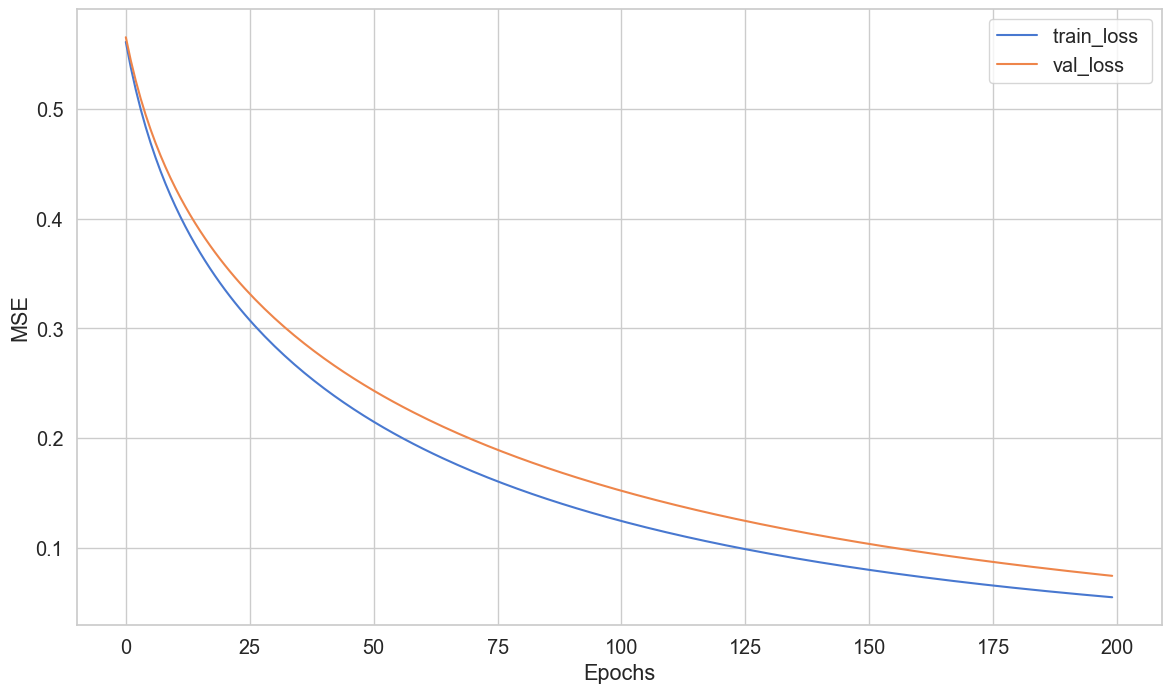

In [271]:
###############################################################################
# TODO : Plot the loss of train and loss
###############################################################################
n = np.arange(0,200)
train_loss = recommender.train_loss
val_loss = recommender.val_loss
plt.figure()
plt.plot(n,train_loss[n],n,val_loss[n])
plt.legend(['train_loss ','val_loss'])
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.show()
#TODO

In [272]:
p=recommender.predictions(recommender.P,recommender.Q)
print('max train:',np.amax(train[np.where(train!=0)]))
print('min train:',np.amin(train[np.where(train!=0)]))
print('median train:',np.median(train[np.where(train!=0)]))
print('mean train:',np.mean(train[np.where(train!=0)]))

print('\nlast epoch train_loss :',train_loss[199])
print('last epoch val_loss :',val_loss[199])


print('\nmax of predicted matrix:',np.amax(p[np.where(p!=0)]))
print('min of predicted matrix:',np.amin(p[np.where(p!=0)]))
print('mean of predicted matrix:',np.mean(p[np.where(p!=0)]))
print('median of predicted matrix:',np.median(p[np.where(p!=0)]))


max train: 0.9205125079033845
min train: 2.835294884844498e-06
median train: 0.000740011964944414
mean train: 0.002108383043730165

last epoch train_loss : 0.0550264878156837
last epoch val_loss : 0.07453721975194963

max of predicted matrix: 3.4608137204905676
min of predicted matrix: -3.6062527036806933
mean of predicted matrix: 7.696138858935706e-06
median of predicted matrix: 7.970589199736188e-06
0.039374108520112965
0.031189950507635084


#####  به طور کلی چند مشکل وجود دارد مقادیر از 0تا1 توزیع شده اند اما میانگین داده ها نسبت به طول باز یک پانصدم است و میانه داده ها نیز کمتر از یک هزارم و همه این ها بخاطر معیار بدی است که برای ریتینگ در نظر گرفته شده و هر چقدر هم که روی مدل فیت شده کار شود و حتی اگر ولیدیشن لاس به 0.01 برسد یعنی به طورمتوسط ریتینگ ها 0.1 با مقدار واقعی خود فاصله دارند. چیزی که باید به آن توجه شود نسبت 0.1 به 1 نیست، نسبت 0.1 به 0.002 است که متوسط داده هاست، این یعنی بیش از 50 برابر خطا !!!!! اما ایده و منطق کار خب جالب است و اگر داده آموزشی را به نحو بهتری برای نمره دهی ر(ریتینگ) تفسیر میکردیم نتایج بهتری گرفته می شد.

# Bonus
**Can you improve the accuracy of model? If so, Do it and explain why it imporved! (Note that improvement must be noticable) (+10 pts)**

# Making recommendations

In [273]:
user_id = 1236
user_index = ratings_df.index.get_loc(user_id)
predictions_index = np.where(train[user_index, :] == 0)[0]

rating_predictions = recommender.predict(train, user_index)
rating_predictions

array([ 0.11577803,  0.08845188,  0.03855026, ..., -0.04080683,
        0.06446459, -0.09260545])

In [274]:
def create_artist_ratings(artists_df, artists_index, ratings, n=10):
  artist_ids = ratings_df.columns[artists_index]
  artist_ratings = pd.DataFrame(data=dict(artistId=artist_ids, rating=ratings))
  top_n_artists = artist_ratings.sort_values("rating", ascending=False).head(n)
  
  artist_recommendations = artists_df[artists_df.id.isin(top_n_artists.artistId)].reset_index(drop=True)
  artist_recommendations['rating'] = pd.Series(top_n_artists.rating.values)
  return artist_recommendations.sort_values("rating", ascending=False)

In [275]:
existing_ratings_index = np.where(train[user_index, :] > 0)[0]
existing_ratings = train[user_index, existing_ratings_index]

create_artist_ratings(artists, existing_ratings_index, existing_ratings)

,id,name,rating
0,475,Eminem,0.052734
1,812,Dark Tranquillity,0.029742
2,854,Alice in Chains,0.029031
3,978,Disturbed,0.021690
4,1131,Tool,0.021562
5,1179,Billy Talent,0.016280
6,1410,Pendulum,0.010354
7,2479,Twiztid,0.009614
8,6257,Rob Zombie,0.008375
9,6618,D12,0.007579


In [276]:
# Your Systems Recommendation for specific user_id on its unobserved ratings:
create_artist_ratings(artists, predictions_index, rating_predictions)

,id,name,rating
0,106,Pleq & Segue,0.413466
1,168,דניאל סלומון,0.405361
2,8170,Slums Attack,0.386893
3,9291,The Brady Bunch,0.386593
4,11268,Мельница,0.370319
5,12217,John Mayer & Taylor Swift,0.360848
6,14701,Promises,0.358071
7,14937,Air Formation,0.355827
8,15832,Ivan$Stani,0.354863
9,17408,Fabio Concato,0.349973


# Bonus
**Whatever innovation you can the on representing results of your system visually (+5 pts, note that top visualizations in sense of innovation will get the point)**